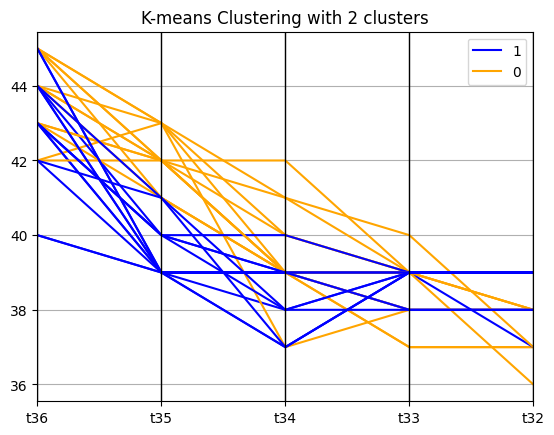

Silhouette Score for 2 clusters (K-means): 0.2662434718784396
Calinski–Harabasz Score for 2 clusters (K-means): 13.90083644504823
Davies-Bouldin Score for 2 clusters (K-means): 1.323511834135195


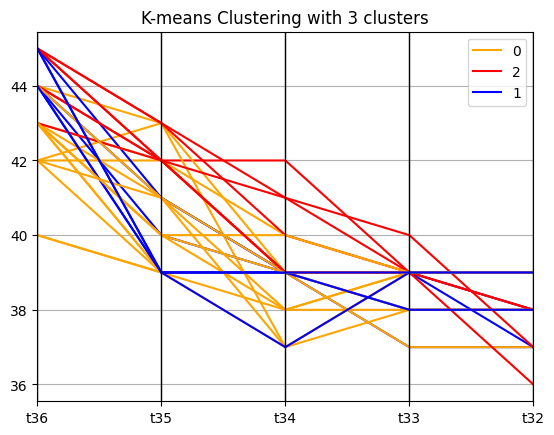

Silhouette Score for 3 clusters (K-means): 0.14860229296352767
Calinski–Harabasz Score for 3 clusters (K-means): 7.985368528057936
Davies-Bouldin Score for 3 clusters (K-means): 1.4632362758195878


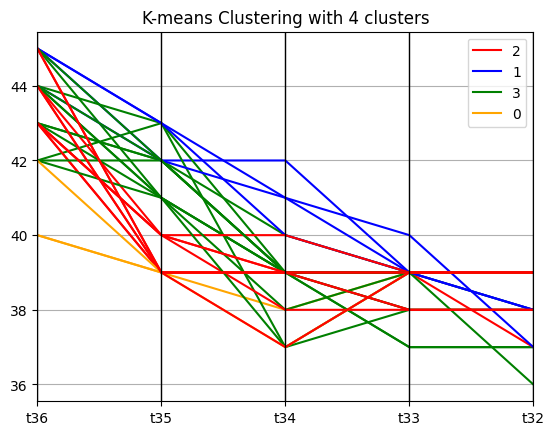

Silhouette Score for 4 clusters (K-means): 0.2521734657648405
Calinski–Harabasz Score for 4 clusters (K-means): 11.408816008839489
Davies-Bouldin Score for 4 clusters (K-means): 1.1632463094218828


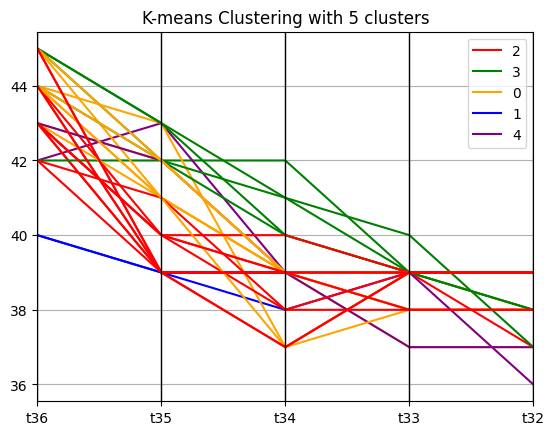

Silhouette Score for 5 clusters (K-means): 0.2238187413509187
Calinski–Harabasz Score for 5 clusters (K-means): 9.439099577030607
Davies-Bouldin Score for 5 clusters (K-means): 1.1584182750553178


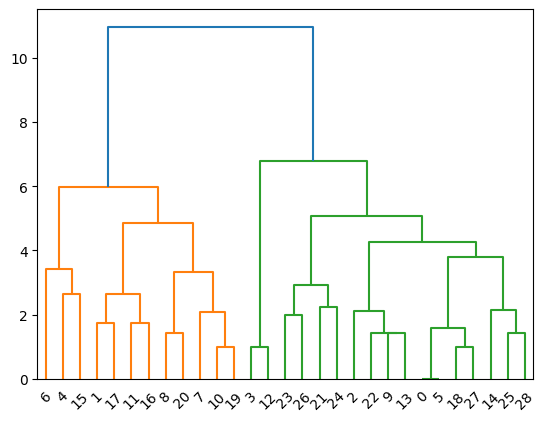

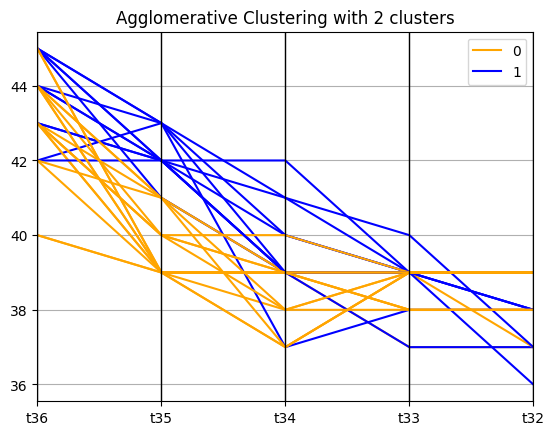

Silhouette Score for 2 clusters (Agglomerative): 0.2626564128227732
Calinski–Harabasz Score for 2 clusters (Agglomerative): 12.944870689655177
Davies-Bouldin Score for 2 clusters (Agglomerative): 1.3511314964626693


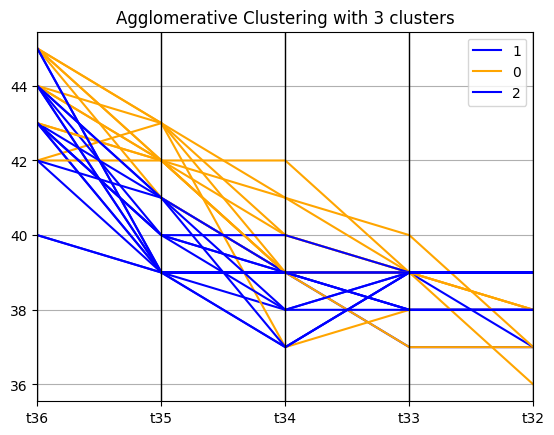

Silhouette Score for 3 clusters (Agglomerative): 0.2601441932416435
Calinski–Harabasz Score for 3 clusters (Agglomerative): 10.577179173357004
Davies-Bouldin Score for 3 clusters (Agglomerative): 1.1143465279335358


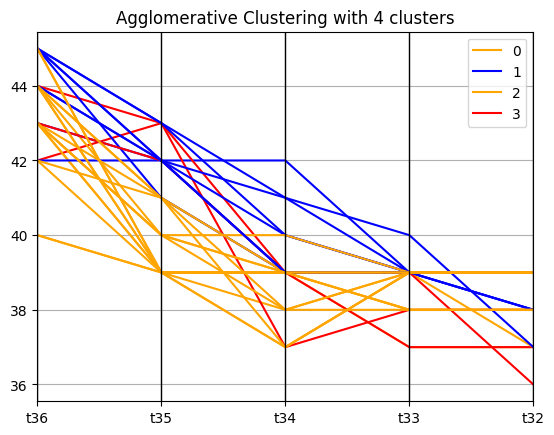

Silhouette Score for 4 clusters (Agglomerative): 0.2691175996399034
Calinski–Harabasz Score for 4 clusters (Agglomerative): 9.956615347915184
Davies-Bouldin Score for 4 clusters (Agglomerative): 1.0595366672475834


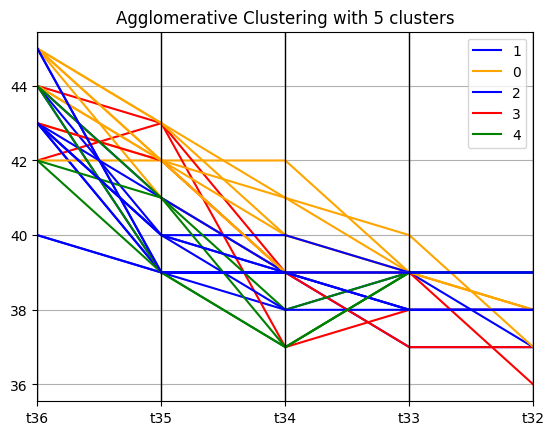

Silhouette Score for 5 clusters (Agglomerative): 0.24438180843166382
Calinski–Harabasz Score for 5 clusters (Agglomerative): 9.519709026322788
Davies-Bouldin Score for 5 clusters (Agglomerative): 1.1718652624845325
Adjusted Rand Index for 2 clusters: 0.24290419451709774
Adjusted Rand Index for 3 clusters: 0.3718063476637426
Adjusted Rand Index for 4 clusters: 0.2737430167597765
Adjusted Rand Index for 5 clusters: 0.4069144619379971


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, adjusted_rand_score
from pandas.plotting import parallel_coordinates
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Данные
data = {
    't36': [43, 45, 44, 40, 42, 43, 44, 42, 45, 44, 43, 45, 40, 43, 44, 43, 45, 44, 43, 44, 45, 42, 43, 44, 42, 45, 44, 43, 45],
    't35': [39, 42, 41, 39, 43, 39, 43, 42, 41, 40, 42, 43, 39, 41, 39, 42, 43, 42, 40, 42, 42, 41, 40, 41, 39, 39, 39, 40, 39],
    't34': [39, 42, 39, 38, 39, 39, 37, 40, 39, 39, 39, 40, 39, 39, 39, 39, 41, 41, 40, 39, 39, 38, 38, 37, 37, 39, 37, 39, 39],
    't33': [39, 39, 37, 39, 37, 39, 38, 39, 39, 38, 39, 39, 39, 38, 39, 39, 40, 39, 39, 39, 39, 39, 38, 39, 39, 38, 39, 39, 39],
    't32': [39, 39, 37, 39, 37, 39, 38, 39, 38, 38, 39, 38, 39, 38, 37, 36, 37, 38, 39, 39, 39, 39, 38, 39, 39, 38, 39, 39, 39]
}

# Создаём DataFrame
df = pd.DataFrame(data)

# Применение алгоритма K-средних (KMeans) для кластеризации
X = df[['t36', 't35', 't34', 't33', 't32']]

# Заданные цвета для кластеров (оранжевый, синий, красный, зеленый)
cluster_colors = ['orange', 'blue', 'red', 'green', 'purple']  # Добавляем фиолетовый на случай 5 кластеров

# Применяем кластеризацию для 2, 3 и 4 кластеров и создаём графики параллельных координат с заданными цветами
for n_clusters in [2, 3, 4, 5]:
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)

    # Добавление информации о кластерах в DataFrame
    df['Cluster'] = kmeans.labels_

    # Задание цветов для каждого ряда в зависимости от кластера
    color_map = [cluster_colors[i % len(cluster_colors)] for i in df['Cluster']]

    # График параллельных координат с конкретными цветами для каждого кластера
    plt.figure()
    parallel_coordinates(df, 'Cluster', color=color_map)
    plt.title(f"K-means Clustering with {n_clusters} clusters")
    plt.show()

    # Оценка качества кластеризации с помощью Silhouette Score
    score = silhouette_score(X, kmeans.labels_)
    print(f"Silhouette Score for {n_clusters} clusters (K-means): {score}")

    # Оценка качества кластеризации с помощью Calinski–Harabasz Score
    score_ch = calinski_harabasz_score(X, kmeans.labels_)
    print(f"Calinski–Harabasz Score for {n_clusters} clusters (K-means): {score_ch}")

    # Оценка качества кластеризации с помощью Davies-Bouldin Score
    score_db = davies_bouldin_score(X, kmeans.labels_)
    print(f"Davies-Bouldin Score for {n_clusters} clusters (K-means): {score_db}")

# Иерархическая кластеризация (Agglomerative Clustering)
# Построение дендрограммы
Z = linkage(X, method='ward')  # Метод "ward" минимизирует варьирование в кластерах
dendrogram(Z)
plt.show()

# Иерархическая кластеризация с 2, 3 и 4 кластерами
for n_clusters in [2, 3, 4, 5]:
    agg_clust = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    labels = agg_clust.fit_predict(X)

    # Добавляем столбец кластеров в DataFrame
    df['Cluster'] = labels

    # Задание цветов для каждого ряда в зависимости от кластера
    color_map = [cluster_colors[i % len(cluster_colors)] for i in df['Cluster']]

    # График параллельных координат с заданными цветами
    plt.figure()
    parallel_coordinates(df, 'Cluster', color=color_map)
    plt.title(f"Agglomerative Clustering with {n_clusters} clusters")
    plt.show()

    # Оценка качества кластеризации с помощью Silhouette Score
    score = silhouette_score(X, labels)
    print(f"Silhouette Score for {n_clusters} clusters (Agglomerative): {score}")

    # Оценка качества кластеризации с помощью Calinski–Harabasz Score
    score_ch = calinski_harabasz_score(X, labels)
    print(f"Calinski–Harabasz Score for {n_clusters} clusters (Agglomerative): {score_ch}")

    # Оценка качества кластеризации с помощью Davies-Bouldin Score
    score_db = davies_bouldin_score(X, labels)
    print(f"Davies-Bouldin Score for {n_clusters} clusters (Agglomerative): {score_db}")

# Сравнение кластеризаций: K-средних и иерархической
for n_clusters in [2, 3, 4, 5]:
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    kmeans_labels = kmeans.labels_

    agg_clust = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    agg_labels = agg_clust.fit_predict(X)

    # Сравнение кластеров с использованием Rand Index
    rand_index = adjusted_rand_score(kmeans_labels, agg_labels)
    print(f"Adjusted Rand Index for {n_clusters} clusters: {rand_index}")



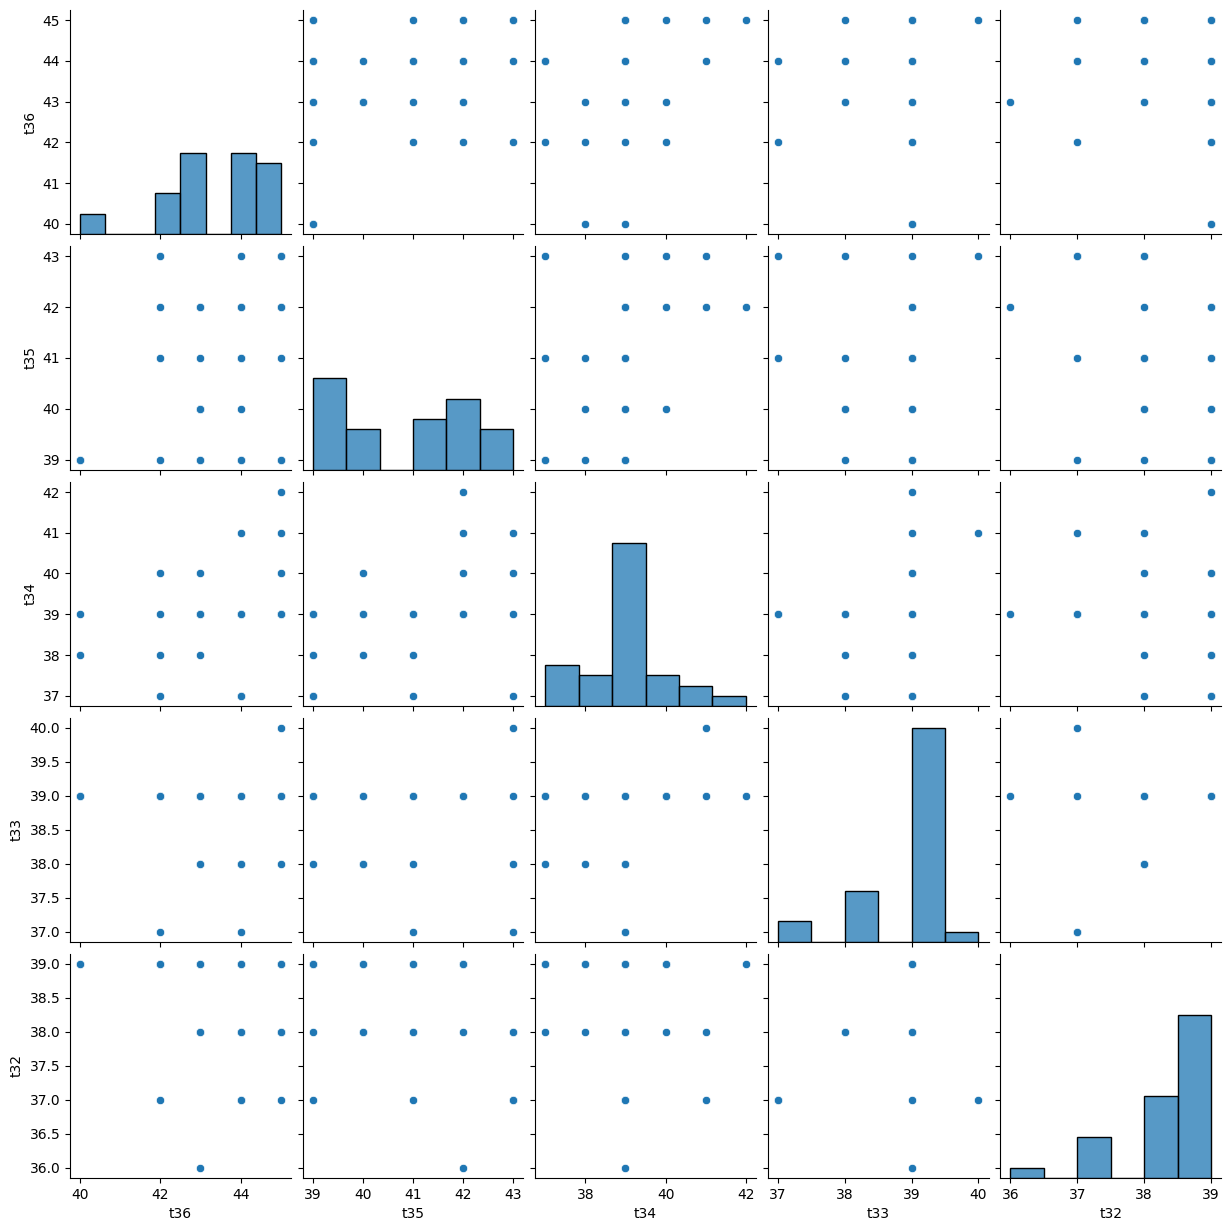

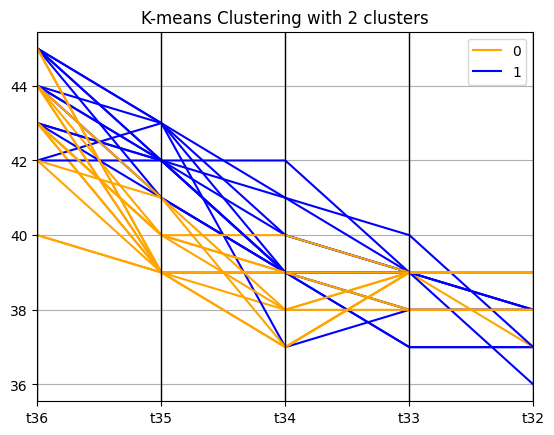

Silhouette Score for 2 clusters (K-means): 0.2662434718784396
Calinski–Harabasz Score for 2 clusters (K-means): 13.90083644504823
Davies-Bouldin Score for 2 clusters (K-means): 1.323511834135195


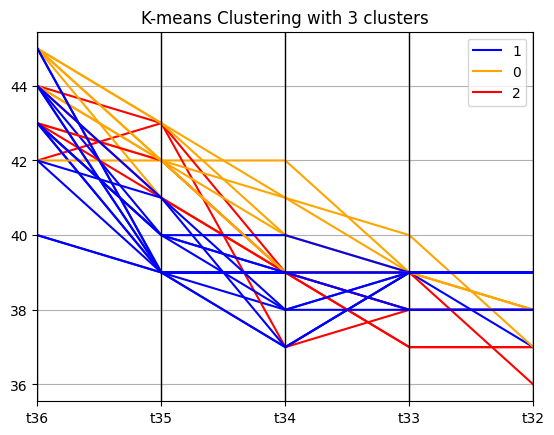

Silhouette Score for 3 clusters (K-means): 0.24746748114579886
Calinski–Harabasz Score for 3 clusters (K-means): 10.579738571877773
Davies-Bouldin Score for 3 clusters (K-means): 1.3069160107895044


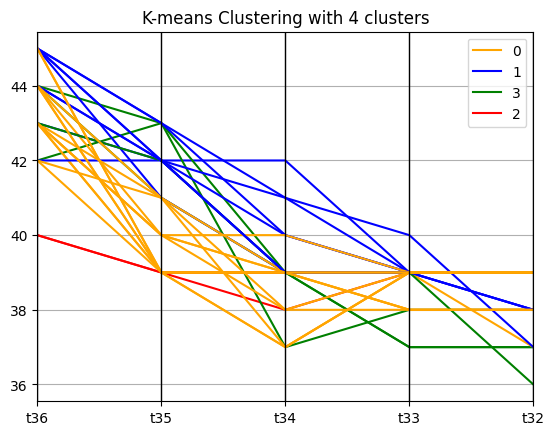

Silhouette Score for 4 clusters (K-means): 0.2779358900834696
Calinski–Harabasz Score for 4 clusters (K-means): 10.678509552947721
Davies-Bouldin Score for 4 clusters (K-means): 1.0855719160998891


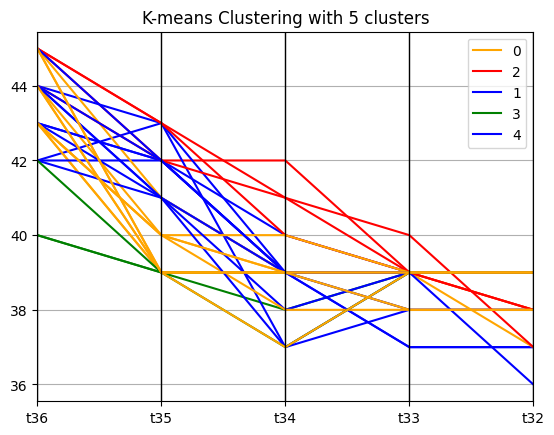

Silhouette Score for 5 clusters (K-means): 0.26405619356162174
Calinski–Harabasz Score for 5 clusters (K-means): 10.986933520300841
Davies-Bouldin Score for 5 clusters (K-means): 1.1454242204344187


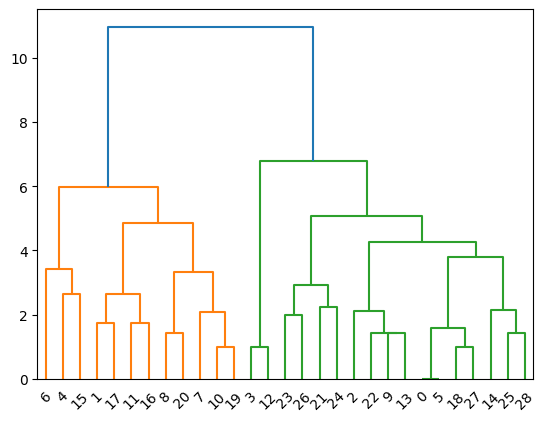

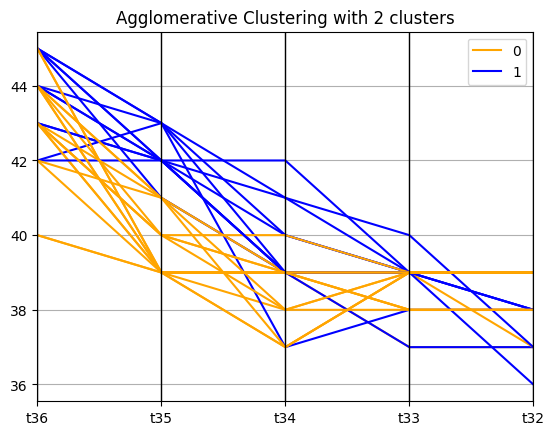

Silhouette Score for 2 clusters (Agglomerative): 0.2626564128227732
Calinski–Harabasz Score for 2 clusters (Agglomerative): 12.944870689655177
Davies-Bouldin Score for 2 clusters (Agglomerative): 1.3511314964626693


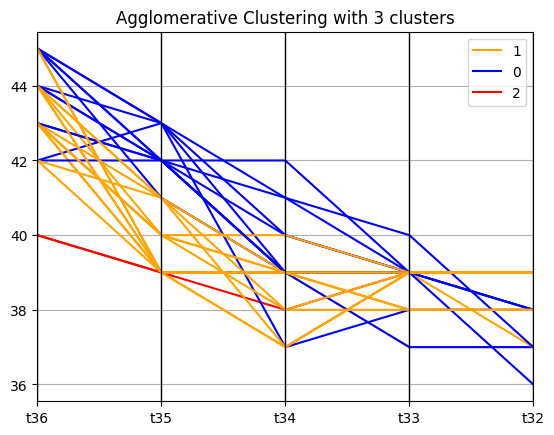

Silhouette Score for 3 clusters (Agglomerative): 0.2601441932416435
Calinski–Harabasz Score for 3 clusters (Agglomerative): 10.577179173357004
Davies-Bouldin Score for 3 clusters (Agglomerative): 1.1143465279335358


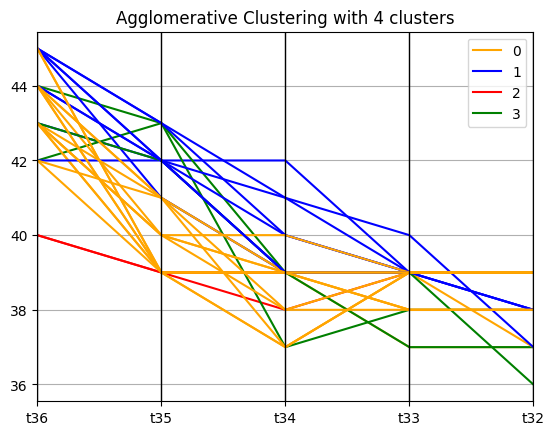

Silhouette Score for 4 clusters (Agglomerative): 0.2691175996399034
Calinski–Harabasz Score for 4 clusters (Agglomerative): 9.956615347915184
Davies-Bouldin Score for 4 clusters (Agglomerative): 1.0595366672475834


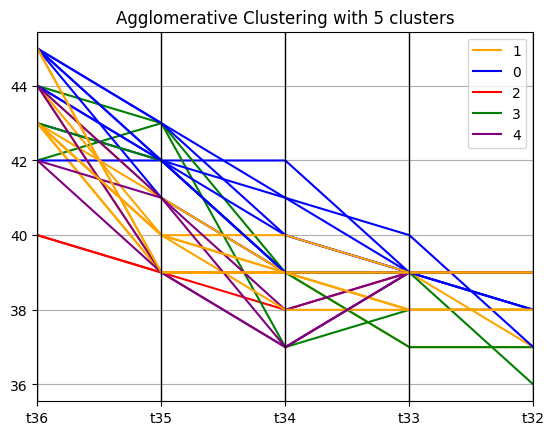

Silhouette Score for 5 clusters (Agglomerative): 0.24438180843166382
Calinski–Harabasz Score for 5 clusters (Agglomerative): 9.519709026322788
Davies-Bouldin Score for 5 clusters (Agglomerative): 1.1718652624845325
Adjusted Rand Index for 2 clusters: 0.7339449541284404
Adjusted Rand Index for 3 clusters: 0.5642346642422406
Adjusted Rand Index for 4 clusters: 0.1991769547325103
Adjusted Rand Index for 5 clusters: 0.22720075464070344


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, adjusted_rand_score
from pandas.plotting import parallel_coordinates
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Данные
data = {
    't36': [43, 45, 44, 40, 42, 43, 44, 42, 45, 44, 43, 45, 40, 43, 44, 43, 45, 44, 43, 44, 45, 42, 43, 44, 42, 45, 44, 43, 45],
    't35': [39, 42, 41, 39, 43, 39, 43, 42, 41, 40, 42, 43, 39, 41, 39, 42, 43, 42, 40, 42, 42, 41, 40, 41, 39, 39, 39, 40, 39],
    't34': [39, 42, 39, 38, 39, 39, 37, 40, 39, 39, 39, 40, 39, 39, 39, 39, 41, 41, 40, 39, 39, 38, 38, 37, 37, 39, 37, 39, 39],
    't33': [39, 39, 37, 39, 37, 39, 38, 39, 39, 38, 39, 39, 39, 38, 39, 39, 40, 39, 39, 39, 39, 39, 38, 39, 39, 38, 39, 39, 39],
    't32': [39, 39, 37, 39, 37, 39, 38, 39, 38, 38, 39, 38, 39, 38, 37, 36, 37, 38, 39, 39, 39, 39, 38, 39, 39, 38, 39, 39, 39]
}

# Создаём DataFrame
df = pd.DataFrame(data)

# Побудова матриці діаграм розсіювання (scatter plot matrix)
sns.pairplot(df)
plt.show()

# Применение алгоритма K-средних (KMeans) для кластеризации
X = df[['t36', 't35', 't34', 't33', 't32']]

# Заданные цвета для кластеров (оранжевый, синий, красный, зеленый)
cluster_colors = ['orange', 'blue', 'red', 'green', 'purple']  # Добавляем фиолетовый на случай 5 кластеров

# Применяем кластеризацию для 2, 3 и 4 кластеров и создаём графики параллельных координат с заданными цветами
for n_clusters in [2, 3, 4, 5]:
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)

    # Добавление информации о кластерах в DataFrame
    df['Cluster'] = kmeans.labels_

    # Задание цветов для каждого ряда в зависимости от кластера
    color_map = [cluster_colors[i % len(cluster_colors)] for i in df['Cluster']]

    # График параллельных координат с конкретными цветами для каждого кластера
    plt.figure()
    parallel_coordinates(df, 'Cluster', color=color_map)
    plt.title(f"K-means Clustering with {n_clusters} clusters")
    plt.show()

    # Оценка качества кластеризации с помощью Silhouette Score
    score = silhouette_score(X, kmeans.labels_)
    print(f"Silhouette Score for {n_clusters} clusters (K-means): {score}")

    # Оценка качества кластеризации с помощью Calinski–Harabasz Score
    score_ch = calinski_harabasz_score(X, kmeans.labels_)
    print(f"Calinski–Harabasz Score for {n_clusters} clusters (K-means): {score_ch}")

    # Оценка качества кластеризации с помощью Davies-Bouldin Score
    score_db = davies_bouldin_score(X, kmeans.labels_)
    print(f"Davies-Bouldin Score for {n_clusters} clusters (K-means): {score_db}")

# Иерархическая кластеризация (Agglomerative Clustering)
# Построение дендрограммы
Z = linkage(X, method='ward')  # Метод "ward" минимизирует варьирование в кластерах
dendrogram(Z)
plt.show()

# Иерархическая кластеризация с 2, 3 и 4 кластерами
for n_clusters in [2, 3, 4, 5]:
    agg_clust = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    labels = agg_clust.fit_predict(X)

    # Добавляем столбец кластеров в DataFrame
    df['Cluster'] = labels

    # Задание цветов для каждого ряда в зависимости от кластера
    color_map = [cluster_colors[i % len(cluster_colors)] for i in df['Cluster']]

    # График параллельных координат с заданными цветами
    plt.figure()
    parallel_coordinates(df, 'Cluster', color=cluster_colors)
    plt.title(f"Agglomerative Clustering with {n_clusters} clusters")
    plt.show()

    # Оценка качества кластеризации с помощью Silhouette Score
    score = silhouette_score(X, labels)
    print(f"Silhouette Score for {n_clusters} clusters (Agglomerative): {score}")

    # Оценка качества кластеризации с помощью Calinski–Harabasz Score
    score_ch = calinski_harabasz_score(X, labels)
    print(f"Calinski–Harabasz Score for {n_clusters} clusters (Agglomerative): {score_ch}")

    # Оценка качества кластеризации с помощью Davies-Bouldin Score
    score_db = davies_bouldin_score(X, labels)
    print(f"Davies-Bouldin Score for {n_clusters} clusters (Agglomerative): {score_db}")

# Сравнение кластеризаций: K-средних и иерархической
for n_clusters in [2, 3, 4, 5]:
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    kmeans_labels = kmeans.labels_

    agg_clust = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    agg_labels = agg_clust.fit_predict(X)

    # Сравнение кластеров с использованием Rand Index
    rand_index = adjusted_rand_score(kmeans_labels, agg_labels)
    print(f"Adjusted Rand Index for {n_clusters} clusters: {rand_index}")


На основании полученных результатов для K-means и Agglomerative Clustering были проанализированы метрики качества кластеризации: Silhouette Score, Calinski–Harabasz Score, Davies-Bouldin Score, а также Adjusted Rand Index для сравнения двух алгоритмов.

# Оптимальное количество кластеров
K-means показал лучший Silhouette Score (0.2779) при разбиении на 4 кластера.
У Agglomerative Clustering наилучший Silhouette Score (0.2691) также при разбиении на 4 кластера.
Оценка по Calinski–Harabasz Score также подтверждает, что для K-means разбиение на 4-5 кластеров лучше, но у Agglomerative Clustering значения начинают снижаться уже после 3 кластеров.
Минимальное значение Davies-Bouldin Score, c лучшей кластеризации, достигается:
Для K-means — при 4 кластерах (1.0856).
Для Agglomerative Clustering — при 4 кластерах (1.0595).
# Сравнение K-means и Agglomerative Clustering
Adjusted Rand Index (ARI) показал, что разбиения наиболее схожи для 2 кластеров (0.7339).
Но при увеличении количества кластеров сходство между разбиениями двух алгоритмов снижается:
При 3 кластерах ARI = 0.5642.
При 4 кластерах ARI = 0.1992.
При 5 кластерах ARI = 0.2272.
# Общий вывод
Для обоих алгоритмов оптимальное количество кластеров — 4, так как это значение дает баланс между Silhouette Score, Calinski–Harabasz Score и Davies-Bouldin Score.
K-means лучше справляется с разбиением данных, особенно при большем количестве кластеров (лучшие показатели метрик качества).
Agglomerative Clustering показывает схожие результаты с K-means, но сходство между разбиениями двух методов наиболее заметно для меньшего числа кластеров (2 или 3).